# <center>"Mini Project 04"</center>

# <center>Titanic Survivors Data Exploration and Visualization</center>

Objectives:

- Understanding concepts of exploratory data analysis.
- Tools and commandsrequired for exploratory data analysis.

### Importing required libraries and modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importing data set:
df = pd.read_csv("C:/Users/Nikki/titanic_survivors.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Columns in given data:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
#finfing out total number of null values in each column:
x = df.isnull().sum()
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Creating a new variable (drop_col) in which we can save all the values that should be dropped from the data:
drop_col = x[x>(35/100)*df.shape[0]]
drop_col

Cabin    687
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#index of drop_col:
drop_col.index

Index(['Cabin'], dtype='object')

In [10]:
#filling out null values in the 'age' column with mean value:
df.fillna(df.mean(), inplace=True)
#new sum  of the null values columnwise:
df.isnull().sum()

C:\Users\Nikki\AppData\Local\Temp\ipykernel_15700\2803713610.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# dropping the entire 'Cabin' column from the given dataset:
df.drop("Cabin", axis = 1, inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# describing basic information of column 'Embarked':
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
#Finding out co-rrelations between columns of the given data:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [15]:
#Adding one more column i.e 'Alone' in the data to find out if the passangers were travlling alone or note:
df['Alone']= [0 if df['Parch'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [16]:
#Finding out surival rate with respect to 'Alone':
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.511737
1    0.343658
Name: Survived, dtype: float64

In [17]:
#Finding out correlation between 'Alone' and 'Fare' columns of dataset:
df[['Alone', 'Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.237717
Fare,-0.237717,1.000000


In [18]:
#Survival rate on  the basis of "Embarkde":
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [19]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


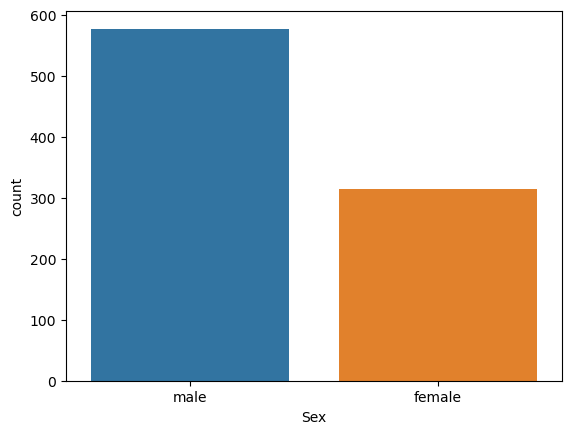

In [20]:
#Plotting countplot of data according  to 'Sex' column:
sns.countplot(df['Sex']);

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

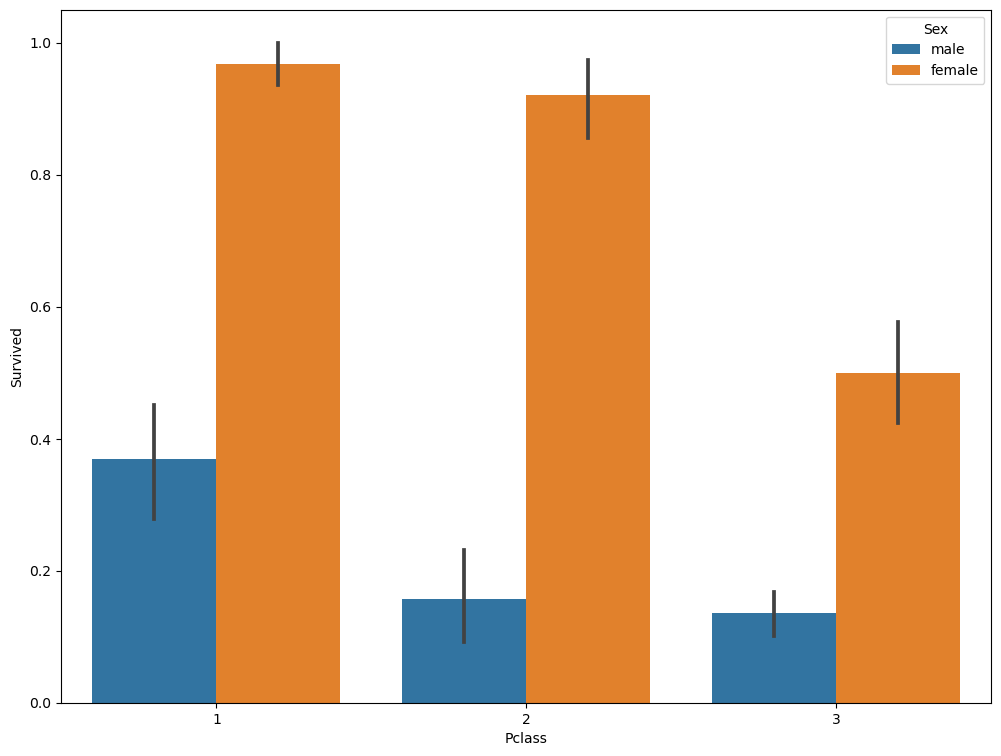

In [21]:
#Survvival rate with respect to 'Pclass' and 'Sex' column:
plt.figure(figsize=(12,9))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data=df)

In [22]:
import sys
!{sys.executable} -m pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable


In [23]:
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable


In [24]:
#Generating report for new data set of 'Airlines' with the help ProfileReport:

import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('airline_data.csv')
print(df)

C:\Users\Nikki\AppData\Local\Temp\ipykernel_15700\3300332312.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


       Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0         1295781  1998        2      4           2          4  1998-04-02   
1         1125375  2013        2      5          13          1  2013-05-13   
2          118824  1993        3      9          25          6  1993-09-25   
3          634825  1994        4     11          12          6  1994-11-12   
4         1888125  2017        3      8          17          4  2017-08-17   
...           ...   ...      ...    ...         ...        ...         ...   
26995      821542  2017        1      1          24          2  2017-01-24   
26996     1910565  2013        2      6          27          4  2013-06-27   
26997        9055  2016        3      8          26          5  2016-08-26   
26998       84136  2009        3      8           8          6  2009-08-08   
26999      113029  1993        3      7          17          6  1993-07-17   

      Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Rep

In [25]:
profile = ProfileReport(df)
profile.to_file(output_file= "airline_data_report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Nikki\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion

- Titanic survivals: We had sorted null values from this data Age, cabin and Embarked. 
- We had plotted the bar graph in that females had survived more than male. 
- More passenger survived who were travelling alone than those travelling with friends or family.
- In titanic the count of male is more and females are less. 
- We had sorted the alone persons are more than Families. Cherbourg, Queenstown, Southampton are embarked and survived more in Titanic.
- Maximum passengers who survived are 1st Class females while the least are 3rd class males.

# Thank You!!!